In [ ]:
#import pyart
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
from mpl_toolkits.basemap import Basemap
import pickle
import pyart
#warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
fh = open('/data/ena_terrain.pickle', 'rb')
data_dict = pickle.load(fh)
fh.close()

In [47]:
ena_radar = pyart.aux_io.gamic_hdf5.read_gamic(\
'/data/radar/ENA/xsapr2_data/stability-ppi_XSAPR2_20160610160808_00.h5')
print(ena_radar.latitude['data'], ena_radar.longitude['data'])
print(ena_radar.fields.keys())
print(ena_radar.fields['reflectivity']['units'])
ena_radar.fields['reflectivity']['units'] = 'dBZ'
ena_radar.fields['corrected_reflectivity']['units'] = 'dBZ'
ena_radar.latitude['data'] = np.array([39.091186111])
ena_radar.longitude['data'] = np.array([-28.02649722]) 

[ 34.731416] [-86.661224]
dict_keys(['specific_differential_phase', 'differential_phase', 'differential_reflectivity', 'corrected_velocity', 'reflectivity', 'corrected_differential_reflectivity', 'spectrum_width', 'corrected_reflectivity', 'normalized_coherent_power', 'cross_correlation_ratio', 'corrected_differential_phase'])
b'dBZ'


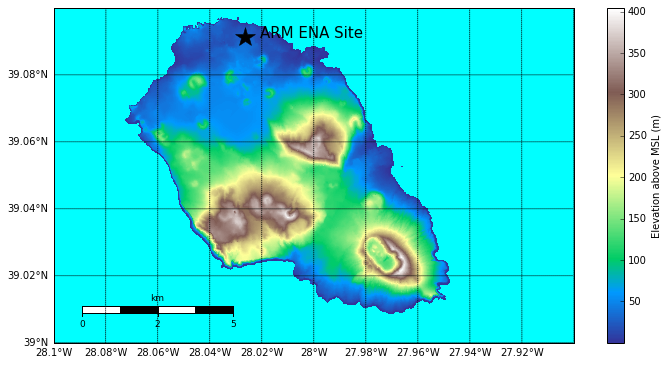

In [63]:
llcrnrlat=39
urcrnrlon=-27.9
llcrnrlon=-28.1
urcrnrlat=39.1
lats = np.arange(llcrnrlat, urcrnrlat, .02)
lons = np.arange(llcrnrlon, urcrnrlon, .02)
fig = plt.figure(figsize=(12, 6))
m = Basemap(projection='lcc', lon_0=-28, lat_0=39, resolution='c', 
           llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
xx, yy = m(data_dict['lon'], data_dict['lat'])
im1 = m.pcolormesh(xx, yy, 
                   data_dict['numpy_dem'], cmap=plt.cm.terrain)
plt.colorbar(label = 'Elevation above MSL (m)')
# labels = [left,right,top,bottom]
m.drawparallels(lats,labels=[True,False,False,False])
m.drawmeridians(lons,labels=[False,False,False,True])
# annotate
m.drawcountries()
m.drawcoastlines(linewidth=.5)
plt.gca().set_axis_bgcolor('aqua')
xradar, yradar = m(ena_radar.longitude['data'],
                  ena_radar.latitude['data'])
m.plot(xradar,yradar, 'k*', markersize = 20)
plt.text(xradar+500,yradar, 'ARM ENA Site', fontsize = 15)
m.drawmapscale( -28.06, 39.01, 0, 0, 5, barstyle='fancy')

In [60]:
m.drawmapscale?

<a list of 11 text.Text objects>

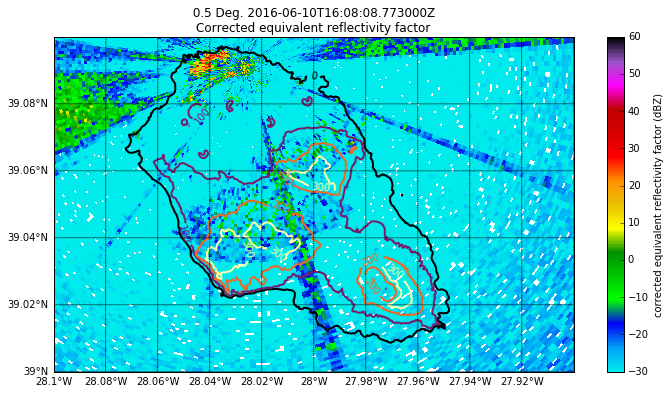

In [44]:
fig = plt.figure(figsize=(12, 6))
my_display = pyart.graph.RadarMapDisplay(ena_radar)
my_display.plot_ppi_map('corrected_reflectivity', basemap = m,
                       lat_lines = lats, lon_lines = lons,
                       vmin = -30, vmax = 60)

CS = m.contour(xx, yy, 
                   data_dict['numpy_dem'].data,
               levels = np.arange(0,400, 100),
               linewidths = 2, cmap=plt.cm.inferno)

plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f')

In [16]:
my_display.plot_ppi_map?

In [38]:
foo = data_dict['numpy_dem']
